In [17]:
# </path/to>/build/bin/hipace <input>

import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics
from scipy import constants

from matplotlib import patches
from matplotlib import ticker

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import ConnectionPatch

import sys
sys.path.append('/Users/max/HiPACE/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')

####################################################################################################
ncolors = 256
# ncolors = 1024
color_array1 = plt.get_cmap('RdBu')(range(ncolors))
color_array2 = plt.get_cmap('PuOr')(range(ncolors))
color_array3 = plt.get_cmap('PRGn')(range(ncolors))
color_array4 = plt.get_cmap('bwr')(range(ncolors))

# change alpha values
color_array1[:,-1] = abs(np.linspace(-1.0, 1.0, ncolors))
color_array2[:,-1] = abs(np.linspace(-1.0, 1.0, ncolors))
color_array3[:,-1] = abs(np.linspace(-1.0, 1.0, ncolors))
color_array4[:,-1] = abs(np.linspace(-1.0, 1.0, ncolors))

# create a colormap object
map_object1 = mcolors.LinearSegmentedColormap.from_list(name = 'RdBuT', colors = color_array1)
map_object2 = mcolors.LinearSegmentedColormap.from_list(name = 'PuOrT', colors = color_array2)
map_object3 = mcolors.LinearSegmentedColormap.from_list(name = 'PRGnT', colors = color_array3)
map_object4 = mcolors.LinearSegmentedColormap.from_list(name = 'bwrT', colors = color_array4)

# register this new colormap with matplotlib
# plt.register_cmap(cmap = map_object1)
# plt.register_cmap(cmap = map_object2)
# plt.register_cmap(cmap = map_object3)
# plt.register_cmap(cmap = map_object4)
####################################################################################################

di = 'drive'

ts = LpaDiagnostics('/Users/max/HiPACE/recovery/diags/hdf5/recovery/' + di + '/', check_all_files = True)
driveInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/recovery/' + di + '/reduced_drive.0000.txt')

In [23]:
def skinDepth(ne):
        """
        Calculates plasma skin depth based off plasma electron density

        Parameters
        ----------
        ne : float
        plasma electron density (in cm^-3)
        
        Returns
        -------
        kp_inv : float
        plasma skin depth in m
        """

        wp = 1e-3 * np.sqrt((ne * constants.e**2) / (constants.epsilon_0 * constants.m_e)) # SI
        
        kp_inv = 1e-6 * constants.c / wp # m
        
        return kp_inv

def getZ(F, info):
        """
        returns on-axis longitudinal slice of field
        """
        return F[:, len(info.x)//2].T





In [24]:
i = 0
kp_inv = skinDepth(4e16)
kp = 1/kp_inv

ExmBy, info = ts.get_field(field = 'ExmBy', iteration = i)
Ez = getZ(ts.get_field(field = 'Ez', iteration = i)[0], info)
xd, zd, wd = ts.get_particle(species = 'drive', iteration = i, var_list = ['x', 'z', 'w'])

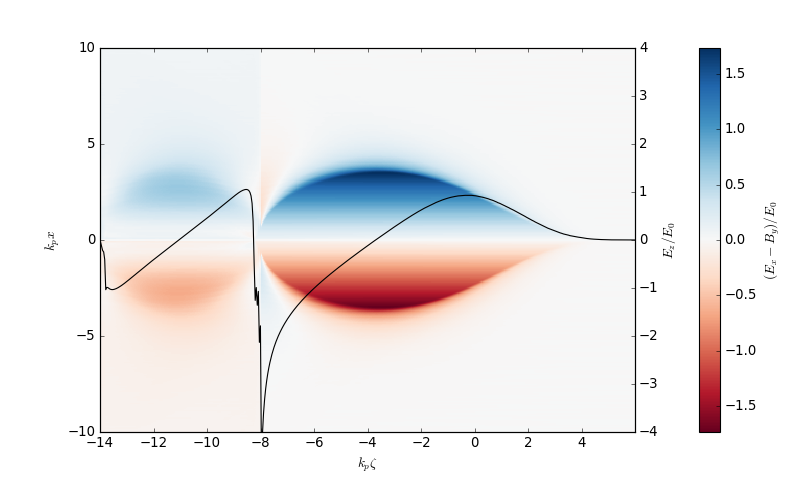

In [15]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(info.z, info.x, ExmBy.T, cmap = 'RdBu')

# plt.xlim(-34, 6)
plt.xlim(info.zmin, info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-10, 10)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')
plt.xticks(np.arange(round(info.zmin), round(info.zmax), 2))

ax2 = plt.twinx()
ax2.plot(info.z, Ez, color = 'black')
ax2.set_ylim(-4, 4)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size = "4%", pad = .8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = .8)
cax3.remove()


cb2 = plt.colorbar(im, cax = cax2)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$(E_x - B_y)/E_0 $')

# plt.savefig('/Users/max/HiPACE/recovery/images/filamentFrontReco.png', dpi = 300, bbox_inches = 'tight')
plt.show()

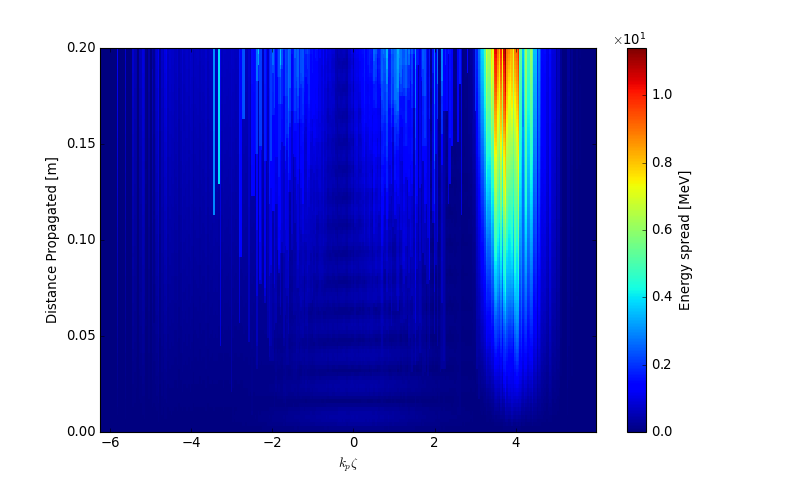

In [27]:
zAx = diag.z_axis(driveInsitu)
beam = zAx[(driveInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(driveInsitu), driveInsitu["time"] * kp_inv, diag.energy_spread_eV(driveInsitu, per_slice = True) / 1e6)

plt.ylim(0, .2)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Energy spread [MeV]')
plt.show()

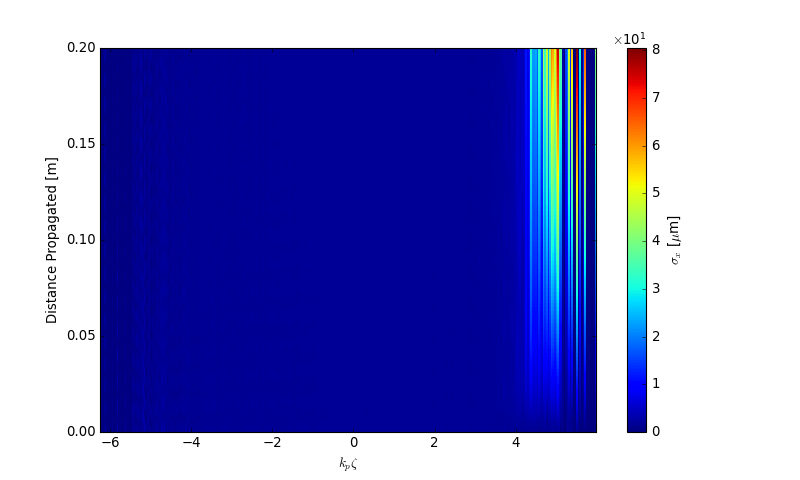

In [28]:
zAx = diag.z_axis(driveInsitu)
beam = zAx[(driveInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(driveInsitu), driveInsitu["time"] * kp_inv, diag.position_std(driveInsitu) * kp_inv * 1e6)

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('$\sigma_x$ [$\mu$m]')
plt.show()

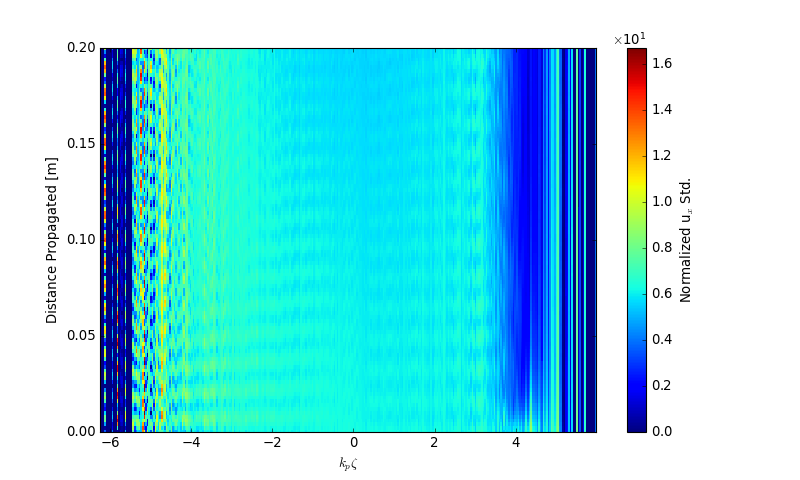

In [29]:
zAx = diag.z_axis(driveInsitu)
beam = zAx[(driveInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(driveInsitu), driveInsitu["time"] * kp_inv, diag.normalized_momentum_std(driveInsitu))

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Normalized u$_x$ Std.')
plt.show()